![title](fraud_detection1.PNG)

### Detecting Fraud in African custom service using Machine learning algorithms.

The increasing amounts of imports and exports have served good purpose in many
African countries and as well as avenue for fraud criminals to carry out their illicit
acts in form of ***tax evasion, smugglings, money laundering, drugs trafficking*** etc.
These very acts made it paramount for the government to find automatic or
semi-automatic solutions to guide the customs’ activities in order to minimize the
number of manual inspection of imports. In this notebook we use various machine
learning techniques to detect if a transaction in a Africa custom service is fraud
or not via Python implementation.

## Information about data

The data use in this analysis was divided in two, one part contained all clean transactions i.e compliance dataset spanning the dimension (483343, 30) and the other contained
fraud transactions i.e non-compliance dataset having dimension of (270688, 34).
The figure below displayed small sample of these two datasets.

![title](real_data.PNG)

# Load libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn


## PART 1

# Read First Dataset (CompliantSea = 0)

In [1]:
f = open('CompliantSea.csv')
corpus = f.read() # read the data 

## Simple preprocessing steps 
 * First we split the data by newline character '\n'; then we split each newline into  tokens.
 * This dataset has 30 features, however some records are incorrectly entered therefore  <br> leading to more than 30 features in a row 
 *  #### We divide the data into two part. 
           * Normal records = 30 features.
           * Abnormal records =  > 30 features.

In [3]:
# this function do exactly what we have explained from the above

def simple_preprocessing_steps(corpus,number_normal_columns):

    lis_sent_ =  corpus.split('\n') # Put each sentence in a list

    lis_sent = [i.split(';') for i in lis_sent_] # Split each sentence into tokens


    normal = []   # List for Normal records (variables count = number_normal_columns)
    abnormal = [] # List for Abnormal records (variables count = '>number_normal_columns')

    for i in lis_sent:
        if len(i) <= number_normal_columns:      
            normal.append(i)  # Append only data whose records is <= number_normal_columns
        else:
            abnormal.append(i) # Otherwise append to abnormal list

    # Compute the percentage of normal records from the overall records
    normal_percent = round((len(normal)/len(lis_sent))*100,2) 

    # Compute the fraction of abnormal records in the overall records
    abnormal_percent = round((len(abnormal)/len(lis_sent))*100,2)
    
    # Display percentage information for normal and abnormal records
    print('{} normal records and {} abnormal records'.format(len(normal),len(abnormal))) 
    print('\n{}% normal records and {}% abnormal records'.format(normal_percent,abnormal_percent))
    
    return normal,abnormal

### Dividng data into Normal and Abnormal

In [4]:
normal,abnormal = simple_preprocessing_steps(corpus,30) # normal records has 30 columns 

463669 normal records and 19676 abnormal records

95.93% normal records and 4.07% abnormal records


# Normal data: each record has 30 columns

In [8]:
df_normal = pd.DataFrame(normal[1:],columns=normal[0])
df_normal.drop(463667,inplace=True)
df_normal.head(4)


,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,ITEMNO,CPC,FRONTIER,HSCODE,DESCRIPTION,...,ENTRYSTATUS,PASSINGOFFICER,VERIFYINGOFFICER,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,F147NO,F147AMOUNT,F147AMOUNTPAID
0,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,1,C400,MSA,8001100000,REFINED TIN METAL INGOTS,...,V,05874,00607,4500,4500,4500,"12553500,15",,,
1,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,2,C400,MSA,2510100000,CALCIUM ALLUMINIUM,...,V,05874,00607,342,300,300,"448409,842",,,
2,2017MSA6575135,MSA,01/08/2017 11:13,02/08/2017 22:02,04/08/2017 16:44,3,C400,MSA,2805120000,CALCIUM METAL,...,V,05874,00607,360,300,300,"248226,905",,,
3,2017MSA6686662,MSA,30/10/2017 09:32,31/10/2017 14:22,03/11/2017 17:22,1,C400,MSA,8507900000,PP EMPTY BATTERY CONTAINER BOXES AND ACCESSORI...,...,V,04899,05047,5991,5761,5761,"2044713,462",,,


In [9]:
df_normal.shape

(463667, 30)

### Describe data

In [10]:
df_normal.describe().T

,count,unique,top,freq
ENTRYNO,463667,135173,2017MSA6582734,230
STATION,463667,3,MSA,414843
REGISTRATIONDATE,463667,89584,24/08/2017 11:39,232
DATEPASSED,463667,97578,16/08/2017 20:47,230
RELEASEDATE,463667,79314,17/06/2017 13:16,432
ITEMNO,463667,230,1,134590
CPC,463667,23,C400,356944
FRONTIER,463667,19,KLD,296444
HSCODE,463667,4024,2204210000,9741
DESCRIPTION,463667,379452,GASOIL FOR LOCAL USE,2773


## Pre-features selection
### Selecting columns based on  Domain Knownledge


* Just by looking at the data from above,we can drop empty columns like <br> F147NO, F147AMOUNT, F147AMOUNTPAID.
* Column like COUNTRYOFDESTINATION that has only one unique value can also be drop.
* Columns that required PIN numbers, Name of Agent, and all other columns that may not  <br> add infomation based on domain knowledge are drop.

### (*reducing the data to 10 feature variables benchmark*)

In [11]:
# This function does what was explained from the above

def select_relevant_columns (dataframe):
    
    # Selecting columns based domain knownledge 
    data = dataframe.loc[:,['STATION','REGISTRATIONDATE','DATEPASSED','ITEMNO',
                     'CPC','HSCODE','GROSSWEIGHT','NETWEIGHT','QUANTITY',
                      'CUSTOMSVALUE']] 
    return data

### Select relevant columns from normal data: columns = 10 features

In [12]:
# select relevant columns from normal data
new_data_normal = select_relevant_columns(df_normal)

new_data_normal.head() # Displaying the top 5 records

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,01/08/2017 11:13,02/08/2017 22:02,1,C400,8001100000,4500,4500,4500,"12553500,15"
1,MSA,01/08/2017 11:13,02/08/2017 22:02,2,C400,2510100000,342,300,300,"448409,842"
2,MSA,01/08/2017 11:13,02/08/2017 22:02,3,C400,2805120000,360,300,300,"248226,905"
3,MSA,30/10/2017 09:32,31/10/2017 14:22,1,C400,8507900000,5991,5761,5761,"2044713,462"
4,MSA,30/10/2017 09:33,31/10/2017 16:22,1,C400,3919100000,166,160,160,"2812576,676"


In [13]:
new_data_normal.shape

(463667, 10)

# Abnormal data: records length = 44

In [14]:
columns = [i for i in df_normal.columns] # list of columns name for normal records
for i in range(31,45):  
    columns.append(i) # add extra columns name
    
df_abnormal = pd.DataFrame(abnormal,columns = columns) # rename the columns to (1 - 44)
df_abnormal.head()

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,ITEMNO,CPC,FRONTIER,HSCODE,DESCRIPTION,...,35,36,37,38,39,40,41,42,43,44
0,2017MSA6352760,MSA,10/02/2017 20:24,16/02/2017 15:53,16/02/2017 17:03,8,C490,KLD,9506910000,"""FITNESS EQUIPMENT",...,None,None,None,None,None,None,None,None,None,None
1,2017MSA6352760,MSA,10/02/2017 20:24,16/02/2017 15:53,16/02/2017 17:03,5,C490,KLD,9506910000,"""FITNESS EQUIPMENT",...,None,None,None,None,None,None,None,None,None,None
2,2017MSA6352760,MSA,10/02/2017 20:24,16/02/2017 15:53,16/02/2017 17:03,1,C490,KLD,9506910000,"""1X40FT CONTAINER STC FITNESS EQUIPMENT",...,None,None,None,None,None,None,None,None,None,None
3,2017MSA6352760,MSA,10/02/2017 20:24,16/02/2017 15:53,16/02/2017 17:03,9,C490,KLD,9506910000,"""FITNESS EQUIPMENT",...,None,None,None,None,None,None,None,None,None,None
4,2017MSA6352760,MSA,10/02/2017 20:24,16/02/2017 15:53,16/02/2017 17:03,7,C490,KLD,9506910000,"""FITNESS EQUIPMENT",...,None,None,None,None,None,None,None,None,None,None


In [15]:
df_abnormal.shape

(19676, 44)

### Select relevant columns from abnormal data: columns = 10 features

In [16]:
abnormal_to_normal = select_relevant_columns(df_abnormal)

abnormal_to_normal.head() # Displaying the top 5 records

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,10/02/2017 20:24,16/02/2017 15:53,8,C490,9506910000,05047,100,100,100
1,MSA,10/02/2017 20:24,16/02/2017 15:53,5,C490,9506910000,05047,60,60,60
2,MSA,10/02/2017 20:24,16/02/2017 15:53,1,C490,9506910000,05047,975,975,975
3,MSA,10/02/2017 20:24,16/02/2017 15:53,9,C490,9506910000,05047,250,250,250
4,MSA,10/02/2017 20:24,16/02/2017 15:53,7,C490,9506910000,05047,120,120,120


In [17]:
abnormal_to_normal.shape

(19676, 10)

## Reordering misplaced features 

In [18]:
abnormal_to_normal['GROSSWEIGHT'] =  df_abnormal.NETWEIGHT
abnormal_to_normal['NETWEIGHT']   =  df_abnormal.QUANTITY
abnormal_to_normal['QUANTITY']    =  df_abnormal.CUSTOMSVALUE
abnormal_to_normal['CUSTOMSVALUE'] = df_abnormal.F147NO

abnormal_to_normal.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,10/02/2017 20:24,16/02/2017 15:53,8,C490,9506910000,100,100,100,"103480,695"
1,MSA,10/02/2017 20:24,16/02/2017 15:53,5,C490,9506910000,60,60,60,"235291,449"
2,MSA,10/02/2017 20:24,16/02/2017 15:53,1,C490,9506910000,975,975,975,"2152737,254"
3,MSA,10/02/2017 20:24,16/02/2017 15:53,9,C490,9506910000,250,250,250,"471261,383"
4,MSA,10/02/2017 20:24,16/02/2017 15:53,7,C490,9506910000,120,120,120,"233255,559"


### Concatinating normal and abnormal dataframe for the 10 selected features

### Add new variable (Target = 1). This label indicate "clean transaction"

In [19]:
# concatinate new_data_normal and abnormal_to_normal
concat_compliance_df = pd.concat([new_data_normal,abnormal_to_normal])

# attached Target variable to the dataframe where Target = 1 {compliance : 1}
concat_compliance_df['Target'] = 1
concat_compliance_df.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target
0,MSA,01/08/2017 11:13,02/08/2017 22:02,1,C400,8001100000,4500,4500,4500,"12553500,15",1
1,MSA,01/08/2017 11:13,02/08/2017 22:02,2,C400,2510100000,342,300,300,"448409,842",1
2,MSA,01/08/2017 11:13,02/08/2017 22:02,3,C400,2805120000,360,300,300,"248226,905",1
3,MSA,30/10/2017 09:32,31/10/2017 14:22,1,C400,8507900000,5991,5761,5761,"2044713,462",1
4,MSA,30/10/2017 09:33,31/10/2017 16:22,1,C400,3919100000,166,160,160,"2812576,676",1


In [20]:

concat_compliance_df.shape

(483343, 11)

# PART 2

# Read Second Dataset ('NCompliantSea = 1)

In [17]:
f2 = open('NCompliantSea.csv')
corpus2 = f2.read() # read the data 

## Simple preprocessing steps

In [18]:
 # normal records has 34 columns while abnormal has more than 34 columns
normal2,abnormal2 = simple_preprocessing_steps(corpus2,34)

267292 normal records and 3398 abnormal records

98.74% normal records and 1.26% abnormal records


## Normal data: each record has 34 columns

In [19]:
df_normal2 = pd.DataFrame(normal2[1:],columns=normal2[0])
df_normal2.drop(267290,inplace=True)
df_normal2.head(4)

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,FRONTIER,CONSIGNEEPIN,CONSIGNEENAME,CONSIGNORPIN,CONSIGNORNAME,...,NETWEIGHT,QUANTITY,CUSTOMSVALUE,AMOUNTPAID,F147NO,F147ITEMNO,TAXCODE,TAXDESC,F147TAXAMOUNT,F147PAIDAMOUNT
0,2017MSA6577737,MSA,02/08/2017 15:51,19/08/2017 13:37,19/08/2017 02:25,,P051606785W,IGSAR GROUP KENYA LIMITED,,"KAMPHAENGPHET EXPORT CO., LTD AC APEX CO",...,234000,234000,"10757442,85",5157432,2017MSA1156596,1,110,Import Duty - Oil,123322,134296
1,2017MSA6699782,MSA,07/11/2017 11:15,07/11/2017 13:14,08/11/2017 05:16,KLD,A006586526E,SAMUEL GAMBO MUYE,,BOYUAN GROUP HOLDINGS CO LIMITED,...,14800,1382,"489085,325",803685,2017MSA1193737,1,110,Import Duty - Oil,116887,227387
2,2017MSA6699782,MSA,07/11/2017 11:15,07/11/2017 13:14,08/11/2017 05:16,KLD,A006586526E,SAMUEL GAMBO MUYE,,BOYUAN GROUP HOLDINGS CO LIMITED,...,1300,1300,"1161954,775",803685,2017MSA1193737,1,110,Import Duty - Oil,116887,227387
3,2017MSA6346427,MSA,06/02/2017 13:43,13/02/2017 17:45,16/02/2017 11:20,KLD,P051316595P,ASPAM ENERGY KENYA LIMITED,,SURYA ENERGY FZC,...,599940,599940,"19052600,73",6185032,2017MSA1087294,2,110,Import Duty - Oil EXTRA,592252,1841903


In [20]:
df_normal2.shape

(267290, 34)

### Select 10 relevant features for the normal2's records

In [21]:
# select relevant columns from normal data
new_data_normal2 = select_relevant_columns(df_normal2)

new_data_normal2.head() # Displaying the top 5 records

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,02/08/2017 15:51,19/08/2017 13:37,1,C400,1006400000,234749,234000,234000,"10757442,85"
1,MSA,07/11/2017 11:15,07/11/2017 13:14,1,C400,6908900000,14800,14800,1382,"489085,325"
2,MSA,07/11/2017 11:15,07/11/2017 13:14,2,C400,9405400000,1300,1300,1300,"1161954,775"
3,MSA,06/02/2017 13:43,13/02/2017 17:45,1,C400,2714100000,631290,599940,599940,"19052600,73"
4,MSA,22/11/2017 14:08,23/11/2017 17:20,1,C400,2714100000,317810,302300,302300,"10047570,58"


In [22]:
new_data_normal2.shape

(267290, 10)

### Rename the columns of abnormal2's records

In [23]:
# Maximum number of columns in the abnormal records
num_cols_abnormal =  max([len(i) for i in abnormal2]) 

# list of columns name for normal records
columns2 = [i for i in df_normal2.columns] 

for i in range(35,num_cols_abnormal+1):  
    columns2.append(i) # add extra columns name for abnormal records
    
df_abnormal2 = pd.DataFrame(abnormal2,columns = columns2) # rename the columns 
df_abnormal2.head()

,ENTRYNO,STATION,REGISTRATIONDATE,DATEPASSED,RELEASEDATE,FRONTIER,CONSIGNEEPIN,CONSIGNEENAME,CONSIGNORPIN,CONSIGNORNAME,...,40,41,42,43,44,45,46,47,48,49
0,2017MSA6395592,MSA,17/03/2017 16:25,20/03/2017 18:02,23/03/2017 11:31,MSA,A000168451P,NGANGA MATHENGE,,TAS CORPORATION,...,None,None,None,None,None,None,None,None,None,None
1,2017MSA6441361,MSA,24/04/2017 11:15,13/05/2017 12:29,17/05/2017 04:34,KLD,A003917359N,ABDULRAUF ABUBAKAR AHMED MAHRUS,,ECU WORLDWIDE,...,None,None,None,None,None,None,None,None,None,None
2,2017MSA6441361,MSA,24/04/2017 11:15,13/05/2017 12:29,17/05/2017 04:34,KLD,A003917359N,ABDULRAUF ABUBAKAR AHMED MAHRUS,,ECU WORLDWIDE,...,None,None,None,None,None,None,None,None,None,None
3,2017MSA6441361,MSA,24/04/2017 11:15,13/05/2017 12:29,17/05/2017 04:34,KLD,A003917359N,ABDULRAUF ABUBAKAR AHMED MAHRUS,,ECU WORLDWIDE,...,None,None,None,None,None,None,None,None,None,None
4,2017MSA6441361,MSA,24/04/2017 11:15,13/05/2017 12:29,17/05/2017 04:34,KLD,A003917359N,ABDULRAUF ABUBAKAR AHMED MAHRUS,,ECU WORLDWIDE,...,None,None,None,None,None,None,None,None,None,None


In [24]:
df_abnormal2.shape

(3398, 49)

### Select 10 relevant features from the abnormal2 dataframe

In [25]:
abnormal_to_normal2 = select_relevant_columns(df_abnormal2)

abnormal_to_normal2.head() # Displaying the top 5 records

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,17/03/2017 16:25,20/03/2017 18:02,1,C400,8703239000,"2AZ-H490520""",1460,1460,1
1,MSA,24/04/2017 11:15,13/05/2017 12:29,12,C400,6911100000,"PLATES, CUPS""",757,757,757
2,MSA,24/04/2017 11:15,13/05/2017 12:29,2,C400,8450119000,"WASHING MACHINE""",120,120,2
3,MSA,24/04/2017 11:15,13/05/2017 12:29,1,C400,8528729000,"TELEVISION SET""",50,50,2
4,MSA,24/04/2017 11:15,13/05/2017 12:29,14,C400,9403600000,"DINING TABLES, CHAIRS""",165,165,9


In [26]:
abnormal_to_normal2.shape

(3398, 10)

## Reordering misplaced features 

In [27]:
abnormal_to_normal2['GROSSWEIGHT'] =  df_abnormal2.NETWEIGHT
abnormal_to_normal2['NETWEIGHT']   =  df_abnormal2.QUANTITY
abnormal_to_normal2['QUANTITY']    =  df_abnormal2.CUSTOMSVALUE
abnormal_to_normal2['CUSTOMSVALUE'] = df_abnormal2.AMOUNTPAID

abnormal_to_normal2.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE
0,MSA,17/03/2017 16:25,20/03/2017 18:02,1,C400,8703239000,1460,1460,1,755495
1,MSA,24/04/2017 11:15,13/05/2017 12:29,12,C400,6911100000,757,757,757,"49782,861"
2,MSA,24/04/2017 11:15,13/05/2017 12:29,2,C400,8450119000,120,120,2,"14934,899"
3,MSA,24/04/2017 11:15,13/05/2017 12:29,1,C400,8528729000,50,50,2,"18668,573"
4,MSA,24/04/2017 11:15,13/05/2017 12:29,14,C400,9403600000,165,165,9,"12445,818"


In [28]:
abnormal_to_normal2.shape

(3398, 10)

### Concatinating normal2 and abnormal2 dataframe for the 12 selected features.
### Add new variable (Target = 0). This label indicate "fraud transaction"

In [29]:
# concatinate new_data_normal2 and abnormal_to_normal2
concat_compliance_df2 = pd.concat([new_data_normal2,abnormal_to_normal2])

# attached Target variable to the dataframe where Target = 0 {No-compliance : 0}
concat_compliance_df2['Target'] = 0
concat_compliance_df2.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target
0,MSA,02/08/2017 15:51,19/08/2017 13:37,1,C400,1006400000,234749,234000,234000,"10757442,85",0
1,MSA,07/11/2017 11:15,07/11/2017 13:14,1,C400,6908900000,14800,14800,1382,"489085,325",0
2,MSA,07/11/2017 11:15,07/11/2017 13:14,2,C400,9405400000,1300,1300,1300,"1161954,775",0
3,MSA,06/02/2017 13:43,13/02/2017 17:45,1,C400,2714100000,631290,599940,599940,"19052600,73",0
4,MSA,22/11/2017 14:08,23/11/2017 17:20,1,C400,2714100000,317810,302300,302300,"10047570,58",0


In [30]:
concat_compliance_df2.shape

(270688, 11)

   ## Combine dataframe from Part 1 and Part 2
* Concatenate ComplianceSea dataframe  (<font color = 'red' > concat_compliance_df</font>) <br> &
* N0ComplianceSea dataframe (<font color = 'red' > concat_compliance_df 2</font>) 

In [31]:
data = pd.concat([concat_compliance_df,concat_compliance_df2])
data.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target
0,MSA,01/08/2017 11:13,02/08/2017 22:02,1,C400,8001100000,4500,4500,4500,"12553500,15",1
1,MSA,01/08/2017 11:13,02/08/2017 22:02,2,C400,2510100000,342,300,300,"448409,842",1
2,MSA,01/08/2017 11:13,02/08/2017 22:02,3,C400,2805120000,360,300,300,"248226,905",1
3,MSA,30/10/2017 09:32,31/10/2017 14:22,1,C400,8507900000,5991,5761,5761,"2044713,462",1
4,MSA,30/10/2017 09:33,31/10/2017 16:22,1,C400,3919100000,166,160,160,"2812576,676",1


In [32]:
data.shape

(754031, 11)

# Further cleaning of the dataset on the following:
* We select rows whose numerical columns have <font color = 'red'> numerical values </font> only using isdigit function.
* Then we format each columns according to their right <font color = 'red'> data type  </font>  e.g int64 and float64.

In [33]:
# This function format each column to their respective data types.

def format_columns(df):
    
     # select the first twp string characters
    df['HSCODE'] = df.HSCODE.apply(lambda x: x[:2])
    
    # replace ',' with '.' in the CUSTOMSVALUE columns
    df['CUSTOMSVALUE']  = df.CUSTOMSVALUE.apply(lambda x: x.replace(',', '.'))

    # filter dataframe by selecting rows whose HSCODE value is numeric
    df = df[df.HSCODE.apply(lambda x: x.isdigit())]

    # filter dataframe by selecting rows whose GROSSWEIGHT value is numeric
    df = df[df.GROSSWEIGHT.apply(lambda x: x.isdigit())]

    # filter dataframe by selecting rows whose NETWEIGHT value is numeric
    df = df[df.NETWEIGHT.apply(lambda x: x.isdigit())]

    # filter dataframe by selecting rows whose QUANTITY value is numeric
    df = df[df.QUANTITY.apply(lambda x: x.isdigit())]

    # dictionary of columns : dtype 
    maps = {'ITEMNO': 'int64', 'HSCODE': 'int64', 'GROSSWEIGHT':'int64',
            'NETWEIGHT':'int64','QUANTITY': 'int64', 'CUSTOMSVALUE': 'float64'}
    
    # convert each columns according to their respective data type
    df = df.astype(maps)

    return df

In [34]:
data = format_columns(data)
data.head()

,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target
0,MSA,01/08/2017 11:13,02/08/2017 22:02,1,C400,80,4500,4500,4500,1.255350e+07,1
1,MSA,01/08/2017 11:13,02/08/2017 22:02,2,C400,25,342,300,300,4.484098e+05,1
2,MSA,01/08/2017 11:13,02/08/2017 22:02,3,C400,28,360,300,300,2.482269e+05,1
3,MSA,30/10/2017 09:32,31/10/2017 14:22,1,C400,85,5991,5761,5761,2.044713e+06,1
4,MSA,30/10/2017 09:33,31/10/2017 16:22,1,C400,39,166,160,160,2.812577e+06,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751633 entries, 0 to 3396
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STATION           751633 non-null  object 
 1   REGISTRATIONDATE  751633 non-null  object 
 2   DATEPASSED        751633 non-null  object 
 3   ITEMNO            751633 non-null  int64  
 4   CPC               751633 non-null  object 
 5   HSCODE            751633 non-null  int64  
 6   GROSSWEIGHT       751633 non-null  int64  
 7   NETWEIGHT         751633 non-null  int64  
 8   QUANTITY          751633 non-null  int64  
 9   CUSTOMSVALUE      751633 non-null  float64
 10  Target            751633 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 68.8+ MB


# Export data to csv file

In [ ]:
data.to_csv('full_dataset.csv') # Export to csv file

## Import Basic library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Read the export csv file back to the system

In [3]:
%%time
date_colns = ['REGISTRATIONDATE','DATEPASSED'] # datetime features

# read and parse datetime features to datetime dtype
full_data = pd.read_csv('full_dataset.csv',index_col= 0, parse_dates=date_colns)
full_data.head()

Wall time: 56.3 s


,STATION,REGISTRATIONDATE,DATEPASSED,ITEMNO,CPC,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target
0,MSA,2017-01-08 11:13:00,2017-02-08 22:02:00,1,C400,80,4500,4500,4500,1.255350e+07,1
1,MSA,2017-01-08 11:13:00,2017-02-08 22:02:00,2,C400,25,342,300,300,4.484098e+05,1
2,MSA,2017-01-08 11:13:00,2017-02-08 22:02:00,3,C400,28,360,300,300,2.482269e+05,1
3,MSA,2017-10-30 09:32:00,2017-10-31 14:22:00,1,C400,85,5991,5761,5761,2.044713e+06,1
4,MSA,2017-10-30 09:33:00,2017-10-31 16:22:00,1,C400,39,166,160,160,2.812577e+06,1


In [3]:
full_data.shape

(751633, 11)

### Data Type Information

In [4]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 751633 entries, 0 to 3396
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STATION           751633 non-null  object        
 1   REGISTRATIONDATE  751633 non-null  datetime64[ns]
 2   DATEPASSED        750982 non-null  datetime64[ns]
 3   ITEMNO            751633 non-null  int64         
 4   CPC               751633 non-null  object        
 5   HSCODE            751633 non-null  int64         
 6   GROSSWEIGHT       751633 non-null  int64         
 7   NETWEIGHT         751633 non-null  int64         
 8   QUANTITY          751633 non-null  int64         
 9   CUSTOMSVALUE      751633 non-null  float64       
 10  Target            751633 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 68.8+ MB


## Descriptive Statistics on numerical variables

In [6]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ITEMNO,751633.0,1.151133e+01,1.940554e+01,1.0,1.000,5.000,13.000,2.300000e+02
HSCODE,751633.0,6.628479e+01,2.476531e+01,1.0,40.000,76.000,85.000,9.700000e+01
GROSSWEIGHT,751633.0,1.890287e+04,4.367245e+05,0.0,60.000,486.000,2770.000,5.410200e+07
NETWEIGHT,751633.0,2.350553e+04,4.431070e+05,0.0,100.000,600.000,3065.000,5.410200e+07
QUANTITY,751633.0,2.370709e+04,4.411809e+05,0.0,10.000,157.000,1800.000,5.410200e+07
CUSTOMSVALUE,751633.0,1.749053e+06,1.462256e+07,0.0,29762.533,151176.138,712794.145,2.052096e+09
Target,751633.0,6.418425e-01,4.794591e-01,0.0,0.000,1.000,1.000,1.000000e+00


## Exploratory Data Analysis
 * Univariate data analysis for numerical variables
 * Univariate data analysis for categorical variables

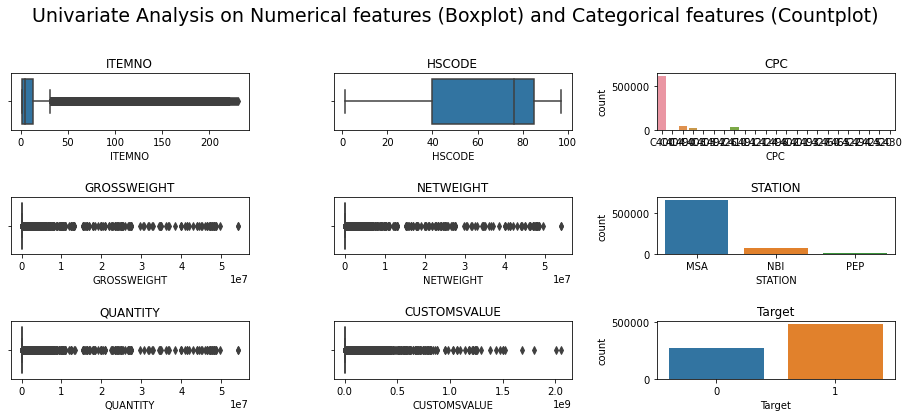

In [46]:

fig, axes = plt.subplots(3,3,figsize = (13,6))
fig.suptitle('Univariate Analysis on Numerical features (Boxplot) \
and Categorical features (Countplot)',fontsize = 19)

# Numerical features
sn.boxplot(x =full_data.ITEMNO,ax = axes[0,0])
sn.boxplot(x =full_data.HSCODE,ax = axes[0,1])
sn.boxplot(x =full_data.GROSSWEIGHT,ax = axes[1,0])
sn.boxplot(x =full_data.NETWEIGHT,ax = axes[1,1])
sn.boxplot(x =full_data.QUANTITY,ax = axes[2,0])
sn.boxplot(x =full_data.CUSTOMSVALUE,ax = axes[2,1])

# Catigorical feature
sn.countplot(full_data.CPC,ax = axes[0,2])
sn.countplot(full_data.STATION,ax = axes[1,2])
sn.countplot(full_data.Target,ax = axes[2,2])

# graph title
axes[0,0].title.set_text('ITEMNO')
axes[0,1].title.set_text('HSCODE')
axes[1,0].title.set_text('GROSSWEIGHT')
axes[1,1].title.set_text('NETWEIGHT')
axes[2,0].title.set_text('QUANTITY')
axes[2,1].title.set_text('CUSTOMSVALUE')

axes[0,2].title.set_text('CPC')
axes[1,2].title.set_text('STATION')
axes[2,2].title.set_text('Target')
fig.tight_layout(pad = 2.0)
plt.show()

##### Just by eye balling the above charts we observed the following:#####
* All numerical features have outliers except for HSCODE. 
* Categorical features: CPC and STATION have classes that <br> are not properly represented on the graph due to low frequency of occurrence.
* The Target variable is not balance (imbalance dataset)

### We count the number of missing data in each  column

In [9]:
full_data.isnull().sum() # count missing values

STATION               0
REGISTRATIONDATE      0
DATEPASSED          651
ITEMNO                0
CPC                   0
HSCODE                0
GROSSWEIGHT           0
NETWEIGHT             0
QUANTITY              0
CUSTOMSVALUE          0
Target                0
dtype: int64

# Feature Engineering:
We will perform the following actions in this section:
1. <font color = 'red'> First, we will drop dublicates if there are any</font>
2. <font color = 'red'> Next, we will Drop missing values for datetime features.</font>
3. <font color = 'red'> Data Transformation (Datetime and Categorical).</font>
     * We will transformed datetime features <br>with fourier transformation.  
     * We will encode categorical features <br> with one-hot encoding.
5.  <font color = 'red'> Fix class imbalance  problem </font>
    * Use the orignal data
    * Fix class imbalance problem (oversampling)

### We need to create the following functions for data transformation
1. Cyclic_enconder : fourier transformation (sine and cosine) for datetime variables 
2. Categorical encoding function (one-hot encoding)


## Cyclical feature convert function

In [4]:
def cyclic_encoder(data,datetime_col_list):
    
    # make a copy
    df = data.copy()
    
    # loop through the list containing date time categories
    for column in datetime_col_list :
        try :
            
            # select day of the year
            DoY = df[column].dt.dayofyear
            # extract the maximum
            max_DoY = DoY.max()
            
            # select hour
            hours = df[column].dt.hour
            # extract the maximum
            hours_max = hours.max()
            
            # apply fourier transformation day of the year
            df[column[:3] + '_DoY_sine'] = DoY.apply(lambda x : np.sin((2 * np.pi*x)/max_DoY))
            df[column[:3] + '_DoY_cos'] = DoY.apply(lambda x : np.cos((2 * np.pi*x)/max_DoY))
            
            # apply fourier transformation hour
            df[column[:3] + '_hours_sine'] = hours.apply(lambda x : np.sin((2 * np.pi*x)/hours_max))
            df[column[:3] + '_hours_cos'] = hours.apply(lambda x : np.cos((2 * np.pi*x)/hours_max))
            
            # Drop existing columns containing data time features
            df.drop(column,axis = 1,inplace = True)           
            
        except(KeyError):
            print('Error1 : Pass column(s) as a list. \nError2 : column(s) does not exist in the dataframe')
            break
            
    return df

## Convert categorical to One-Hot encoding (func)

In [5]:
def cat_encoding(data,cat_list):

    df = data.copy()
    
    # iterate cartegorical feature(s)       
    for i in cat_list:
        
        # Select top 5 most occuring class in a column
        most_occur_class = df[i].value_counts().nlargest(5).keys()
        
        # loop throw each classes in the list
        for cat_class_ in most_occur_class:
            
            # put 1 where the class is present in the column otherwise 0
            df[cat_class_] = np.where(df[i] == cat_class_,1,0).astype('uint8')
            
    # Drop the exist column with string classes
    dff = df.drop(cat_list,axis= 1)
    
    return dff
    

## Removing outliers function

In [6]:
def Remove_Outliers(data, outliers_coln_list):
    # make a copy
    df = data.copy()
    
    # Loop through each column
    for column in outliers_coln_list:
        
        # Compute 25 percentile
        Q1 = np.quantile(df[column], 0.25)
        
        # Compute 75 percentile
        Q3 = np.quantile(df[column], 0.75)
        
        # Compute InterQuartile-Range
        IQ = Q3 - Q1
        
        # Compute Lower bound
        lower_bound = Q1 - 1.5 * IQ
        
        # Compute Upper bound
        upper_bound = Q3 + 1.5 * IQ
        
        # Select where Lower bound is true
        query1 = (df.loc[:,column] >= lower_bound)
        
        # Select where Upper bound is true
        query2 = (df.loc[:,column] <= upper_bound)
        
        # Filter rows by query
        df = df[query1 & query2] 
    return df

### Basic data cleaning

1. Drop dublicates
2. Drop missing values

In [7]:
full_data1 = full_data.copy()

 # Drop dublicates
full_data1.drop_duplicates(inplace = True)

 # Drop missing values
full_data1.dropna(inplace = True) 
full_data1.shape

(549601, 11)

### Features Transformation

In [8]:
%%time

# Transform datetime features
df1 = cyclic_encoder(full_data1,['REGISTRATIONDATE','DATEPASSED']) 

# Transform categoriccal features
df1 = cat_encoding(df1,['CPC'])
df1 = pd.get_dummies(df1, drop_first = True)
df1.head()

Wall time: 21.8 s


,ITEMNO,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,Target,REG_DoY_sine,REG_DoY_cos,REG_hours_sine,...,DAT_DoY_cos,DAT_hours_sine,DAT_hours_cos,C400,C490,C410,C403,C402,STATION_NBI,STATION_PEP
0,1,80,4500,4500,4500,1.255350e+07,1,0.137279,0.990532,0.136167,...,0.782980,-0.269797,0.962917,1,0,0,0,0,0,0
1,2,25,342,300,300,4.484098e+05,1,0.137279,0.990532,0.136167,...,0.782980,-0.269797,0.962917,1,0,0,0,0,0,0
2,3,28,360,300,300,2.482269e+05,1,0.137279,0.990532,0.136167,...,0.782980,-0.269797,0.962917,1,0,0,0,0,0,0
3,1,85,5991,5761,5761,2.044713e+06,1,-0.875892,0.482508,0.631088,...,0.497513,-0.631088,-0.775711,1,0,0,0,0,0,0
4,1,39,166,160,160,2.812577e+06,1,-0.875892,0.482508,0.631088,...,0.497513,-0.942261,-0.334880,1,0,0,0,0,0,0


## Import machine learning libraries

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

## Baseline Models

In [10]:
# Instantiate each model
LR = LogisticRegression(n_jobs=-1)
KNN = KNeighborsClassifier( n_jobs=-1)
D_Tree = DecisionTreeClassifier()

# Append to a list
models_list = [LR,KNN,D_Tree]

## Cross validation for Baseline Models

In [16]:
def model_cross_val_score(df,models):
    
    # Loop through each model
    for model in models:
        # empty dict
        acc_per_model = {}
        
        # make a copy 
        data = df.copy()
        Y_var = data.pop('Target')
        X_vars = data
        
        # apply cross validation
        cros_val = cross_val_score(estimator = model,
                                    X = X_vars,
                                    y=Y_var,
                                    cv=5,
                                    n_jobs=-1,)
        # Compute accuracy
        accuracy = round(cros_val.mean(),2)
        
        # append the accuracy to the corresponding model
        acc_per_model[model] = accuracy
        
        #Display
        print('{} : accuracy = {}% '.format(model,accuracy))


## Fix class imbalance problem (Oversampling)

### Oversampling the minority class to 80% of the major class. i.e 80-100 split

In [11]:
%%time

# data
df2 = df1.copy()
y = df2.pop('Target')
x = df2

# Instantiate RandomOverSampler
random_sampler = RandomOverSampler(sampling_strategy = 0.90)

# Fitting
random_x, random_y = random_sampler.fit_sample(x,y)

# Include Target variable random_x
random_x['Target'] = random_y

# save random_x as random_sample_data
random_sample_data = random_x

Wall time: 2.28 s


## Plot Original dataset and Random Oversampling dataset

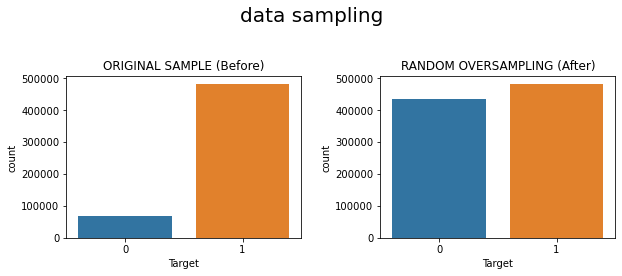

In [18]:
fig,axes = plt.subplots(1,2,figsize = (9,4))
fig.suptitle('data sampling', fontsize = 20)

sn.countplot(y,ax=axes[0])
sn.countplot(random_y,ax=axes[1])

axes[0].title.set_text('ORIGINAL SAMPLE (Before)')
axes[1].title.set_text('RANDOM OVERSAMPLING (After)')

fig.tight_layout(pad = 2)

## Selecting BEST sampling using Cross Validation

1. ### Accuracy of ORIGINAL SAMPLE

In [15]:
# Cross validation for Original data
model_cross_val_score(df1,models_list)


LogisticRegression(n_jobs=-1) : accuracy = 0.88% 
KNeighborsClassifier(n_jobs=-1) : accuracy = 0.85% 
DecisionTreeClassifier() : accuracy = 0.79% 


2. ### Accuracy of RANDOM OVERSAMPLING

In [32]:
# Cross validation for random sampling
model_cross_val_score(random_sample_data,models_list)

LogisticRegression(n_jobs=-1) : accuracy = 0.55% 
KNeighborsClassifier(n_jobs=-1) : accuracy = 0.82% 
DecisionTreeClassifier() : accuracy = 0.93% 


### Random sampling data
* We chose random Oversampling data over the Original data since it has the best accuracy.

In [12]:
# Data for bulding models
work_df = random_sample_data

## Selecting best features and model:
* Start cross validation with 6 columns dataset. 
* At end of each iteration add one feature to the previous dataset.
* Compute the accuracy of each model for the current dataset.
* This process will go on and on for the 23 columns.

### Trying different combination of features with the baseline models.
####  NOTE! This will take over an hour to run successfully!

In [34]:
%%time
max_length_coln = len(work_df.columns)


for i in range(6,max_length_coln):
    
     # select feature
    data1 = work_df.iloc[:,:i]
    
    # add target varible to the new dataset
    data1['Target'] = work_df.Target 
    
    # deplay columns count
    print('\nDataframe has {} features.\n'.format(i)) 
    
    # display list of columns for this specific iteration
    print(str(data1.columns) +'\n')
    
    # do cross validation for this given iteration
    model_cross_val_score(data1,models_list)
    
    


Dataframe has 6 columns.

Index(['ITEMNO', 'HSCODE', 'GROSSWEIGHT', 'NETWEIGHT', 'QUANTITY',
       'CUSTOMSVALUE', 'Target'],
      dtype='object')

LogisticRegression(n_jobs=-1) : accuracy = 0.55% 
KNeighborsClassifier(n_jobs=-1) : accuracy = 0.82% 
DecisionTreeClassifier() : accuracy = 0.92% 

Dataframe has 7 columns.

Index(['ITEMNO', 'HSCODE', 'GROSSWEIGHT', 'NETWEIGHT', 'QUANTITY',
       'CUSTOMSVALUE', 'REG_DoY_sine', 'Target'],
      dtype='object')

LogisticRegression(n_jobs=-1) : accuracy = 0.55% 
KNeighborsClassifier(n_jobs=-1) : accuracy = 0.82% 
DecisionTreeClassifier() : accuracy = 0.92% 

Dataframe has 8 columns.

Index(['ITEMNO', 'HSCODE', 'GROSSWEIGHT', 'NETWEIGHT', 'QUANTITY',
       'CUSTOMSVALUE', 'REG_DoY_sine', 'REG_DoY_cos', 'Target'],
      dtype='object')

LogisticRegression(n_jobs=-1) : accuracy = 0.55% 
KNeighborsClassifier(n_jobs=-1) : accuracy = 0.82% 
DecisionTreeClassifier() : accuracy = 0.92% 

Dataframe has 9 columns.

Index(['ITEMNO', 'HSCODE', 'GROS

### 21  Features is selected 
* Starting from 11 - 21 features the accuracy of models remain the same.
* Just to be on the safer side i have selected the whole 21 features!

In [13]:
# Selected features
features_21 =['ITEMNO', 'HSCODE', 'GROSSWEIGHT', 'NETWEIGHT', 'QUANTITY',
       'CUSTOMSVALUE', 'REG_DoY_sine', 'REG_DoY_cos', 'REG_hours_sine',
       'REG_hours_cos', 'DAT_DoY_sine', 'DAT_DoY_cos', 'DAT_hours_sine',
       'DAT_hours_cos', 'C400', 'C490', 'C410', 'C403', 'C402', 'STATION_NBI',
       'STATION_PEP', 'Target']

# Dataframe
features_21_data = work_df[features_21]
features_21_data.head()

,ITEMNO,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,REG_DoY_sine,REG_DoY_cos,REG_hours_sine,REG_hours_cos,...,DAT_hours_sine,DAT_hours_cos,C400,C490,C410,C403,C402,STATION_NBI,STATION_PEP,Target
0,1,80,4500,4500,4500,1.255350e+07,0.137279,0.990532,0.136167,-0.990686,...,-0.269797,0.962917,1,0,0,0,0,0,0,1
1,2,25,342,300,300,4.484098e+05,0.137279,0.990532,0.136167,-0.990686,...,-0.269797,0.962917,1,0,0,0,0,0,0,1
2,3,28,360,300,300,2.482269e+05,0.137279,0.990532,0.136167,-0.990686,...,-0.269797,0.962917,1,0,0,0,0,0,0,1
3,1,85,5991,5761,5761,2.044713e+06,-0.875892,0.482508,0.631088,-0.775711,...,-0.631088,-0.775711,1,0,0,0,0,0,0,1
4,1,39,166,160,160,2.812577e+06,-0.875892,0.482508,0.631088,-0.775711,...,-0.942261,-0.334880,1,0,0,0,0,0,0,1


In [21]:
features_21_data.shape

(916596, 22)

# Model Evaluation

## Train-Test split (data split)

In [17]:
# Data
X_ = features_21_data.copy()
Y_ = X_.pop('Target')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X_, Y_, test_size = 0.3, random_state = 2, stratify = Y_)

## Decision Tree

In [59]:
# Model instance 
D_Tree = DecisionTreeClassifier(random_state=6)

# Fitting 
D_Tree.fit(X_train,y_train)

# Prediction
pred_D_Tree = D_Tree.predict(X_test)

# Confusion 
confusion_matrix(y_test ,pred_D_Tree )

array([[129701,    552],
       [ 10921, 133805]], dtype=int64)

## Classification report Decision Tree

In [60]:
print(classification_report(y_true = y_test , y_pred = pred_D_Tree ))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    130253
           1       1.00      0.92      0.96    144726

    accuracy                           0.96    274979
   macro avg       0.96      0.96      0.96    274979
weighted avg       0.96      0.96      0.96    274979



### Plotting features importances from Decision Tree

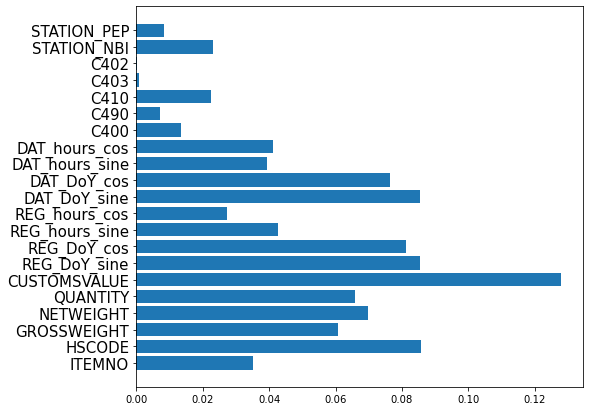

In [65]:
importance1 = D_Tree.feature_importances_
columns = range(len(importance1))

plt.figure(figsize=(8,7))
plt.barh(columns,importance1)
plt.yticks(columns,features_21_data.columns[:21],fontsize = 15)
plt.show()

## KNN

In [61]:
%%time

# Model instance
KNN = KNeighborsClassifier(n_neighbors = 1,n_jobs=-1)

# Fitting
KNN.fit(X_train,y_train)

# Prediction
pred_KNN = KNN.predict(X_test)

# Confusion matrix
confusion_matrix(y_test ,pred_KNN)

Wall time: 49.8 s


array([[129365,    888],
       [ 17767, 126959]], dtype=int64)

## Classification report KKN

In [62]:
print(classification_report(y_true = y_test , y_pred = pred_KNN))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    130253
           1       0.99      0.88      0.93    144726

    accuracy                           0.93    274979
   macro avg       0.94      0.94      0.93    274979
weighted avg       0.94      0.93      0.93    274979



## KNN: GridSearch (Hyperparameter Tuning)

In [123]:
%%time

# Parameters 
hyper_paras = dict(n_neighbors = [1,3,5,10,25], leaf_size = [1,4,14,30,60], p =[1,2])

# Instantiate GridSearch
g_knn = GridSearchCV(KNN,hyper_paras, cv=2)

# Fitting
best_model = g_knn.fit(X_,Y_)

Wall time: 1h 55min 29s


In [124]:
best_model.best_params_

{'leaf_size': 14, 'n_neighbors': 1, 'p': 2}

### KNN: Standardizing the numerical columns

In [33]:
# list of columns awaiting transformation scaling
Numerical_cols = ['ITEMNO', 'HSCODE','GROSSWEIGHT',
                  'NETWEIGHT', 'QUANTITY', 'CUSTOMSVALUE']

# Instantiate the scaler
scaler = StandardScaler()

# Columns transformer pipeline
trans = make_column_transformer((scaler,Numerical_cols), remainder = 'passthrough')

# Fit and transform
X_scale = trans.fit_transform(X_)

# Dataframe
df_scale =pd.DataFrame(X_scale,columns = X_.columns )
df_scale.head()

,ITEMNO,HSCODE,GROSSWEIGHT,NETWEIGHT,QUANTITY,CUSTOMSVALUE,REG_DoY_sine,REG_DoY_cos,REG_hours_sine,REG_hours_cos,...,DAT_DoY_cos,DAT_hours_sine,DAT_hours_cos,C400,C490,C410,C403,C402,STATION_NBI,STATION_PEP
0,-0.523957,0.545457,-0.041128,-0.050369,-0.050657,0.669960,0.137279,0.990532,0.136167,-0.990686,...,0.782980,-0.269797,0.962917,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.473732,-1.659160,-0.050057,-0.059303,-0.059609,-0.089574,0.137279,0.990532,0.136167,-0.990686,...,0.782980,-0.269797,0.962917,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.423507,-1.538908,-0.050018,-0.059303,-0.059609,-0.102134,0.137279,0.990532,0.136167,-0.990686,...,0.782980,-0.269797,0.962917,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.523957,0.745877,-0.037926,-0.047687,-0.047969,0.010586,-0.875892,0.482508,0.631088,-0.775711,...,0.497513,-0.631088,-0.775711,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.523957,-1.097984,-0.050435,-0.059601,-0.059908,0.058766,-0.875892,0.482508,0.631088,-0.775711,...,0.497513,-0.942261,-0.334880,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train-Test Split for scaled data

In [34]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = \
train_test_split( X_scale, Y_, test_size = 0.3, random_state = 2, stratify = Y_)

### KKN model for scaled data

In [65]:
%%time

# Model instance
KNN_scaled = KNeighborsClassifier(n_neighbors = 1,leaf_size=14,n_jobs=-1)

# Fit model
KNN_scaled.fit(X_train_scale,y_train_scale)

# Predict
pred_KNN_scaled = KNN_scaled.predict(X_test_scale)

# Confusion matrix
confusion_matrix(y_test_scale ,pred_KNN_scaled)

Wall time: 2min 57s


array([[129984,    269],
       [  4599, 140127]], dtype=int64)

In [66]:
print(classification_report(y_true = y_test_scale , y_pred = pred_KNN_scaled))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    130253
           1       1.00      0.97      0.98    144726

    accuracy                           0.98    274979
   macro avg       0.98      0.98      0.98    274979
weighted avg       0.98      0.98      0.98    274979



## Random Forest

In [67]:
%%time
# Model instance
RF = RandomForestClassifier(n_jobs = -1,random_state = 6)

#fit model
RF.fit(X_train,y_train)

# Predict
pred_RF = RF.predict(X_test)

# Confusion matrix
confusion_matrix(y_test ,pred_RF)

Wall time: 5min 50s


array([[129795,    458],
       [  1822, 142904]], dtype=int64)

## Classification report Random Forest

In [68]:
print(classification_report(y_true = y_test , y_pred = pred_RF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    130253
           1       1.00      0.99      0.99    144726

    accuracy                           0.99    274979
   macro avg       0.99      0.99      0.99    274979
weighted avg       0.99      0.99      0.99    274979



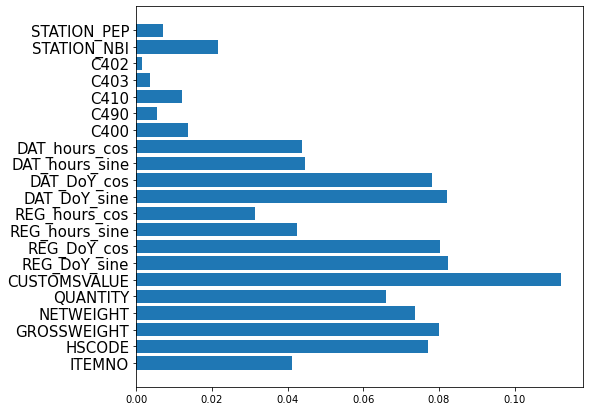

In [72]:
importance1 = RF.feature_importances_
columns = range(len(importance1))

plt.figure(figsize=(8,7))
plt.barh(columns,importance1)
plt.yticks(columns,features_21_data.columns[:21],fontsize = 15)
plt.show()

### Cross Validation for Random Forest

In [74]:
%%time

# data
X_ = features_21_data.copy()
Y_ = X_.pop('Target')

# Model instance
model = RandomForestClassifier()

# Cross Validation
cros_val = cross_val_score(estimator = model,X = X_, y=Y_, cv=5, n_jobs=-1,)

# Display
print('Average Accuracy score : {}%'.format(round(cros_val.mean(),2)))


Average Accuracy score : 0.9815622109072427
Wall time: 27min 28s


### Calculate True Positive Rate, False Positive rate and AUC_Score

In [159]:
# Decision Tree
y_pred1 = D_Tree.predict_proba(X_test)[:,1] # probablity prediction
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred1) # False,True positive rate
auc_score1 = roc_auc_score(y_test,y_pred1)  # auc score

# KNN
y_pred2 = KNN.predict_proba(X_test)[:,1] # probablity prediction
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred2)  # False,True positive rate
auc_score2 = roc_auc_score(y_test,y_pred2) # auc score

# KNN Scaled
y_pred3 = KNN_scaled.predict_proba(X_test_scale)[:,1] # probablity prediction
fpr3, tpr3, thresholds3 = roc_curve(y_test_scale,y_pred3) # False,True positive rate
auc_score3 = roc_auc_score(y_test,y_pred3) # auc score

# Random Forest
y_pred4 = RF.predict_proba(X_test)[:,1] # probablity prediction
fpr4, tpr4, thresholds4 = roc_curve(y_test,y_pred4)  # False,True positive rate
auc_score4 = roc_auc_score(y_test,y_pred4) # auc score


### Plot the ROC_AUC Curve 

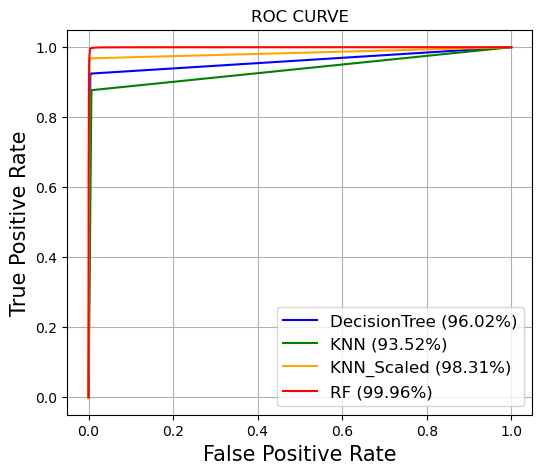

In [151]:
plt.figure(figsize = (6,5))

#plot fpr against tpr for each model
plt.plot(fpr1,tpr1,color = 'blue')
plt.plot(fpr2,tpr2,color = 'green')
plt.plot(fpr3,tpr3,color ='orange')
plt.plot(fpr4,tpr4,color = 'red')

# Name of model and auc_score
name_score = [('DecisionTree',auc_score1),('KNN',auc_score2),
              ('KNN_Scaled',auc_score3),('RF',auc_score4)]
# Empty list
labels = [] 

# append name and score to labels list
for name,score in name_score:
    string = '{} ({}%)'.format(name, round(score*100,2))
    labels.append(string)
    
# Title
plt.title('ROC CURVE')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.grid()

plt.legend(labels,fontsize = 12)
plt.show()
